# Web Scraping
## Country: Kenya

### Newspaper: Business Daily Africa
* Scraped Date: 2019-11-07

In [150]:
# Install dependencies
import requests
from bs4 import BeautifulSoup
from splinter import Browser
import pandas as pd
import time
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [151]:
# Install and initiate Chromedriver (https://splinter.readthedocs.io/en/latest/drivers/chrome.html)
!which chromedriver

/usr/local/bin/chromedriver


In [152]:
# Execute path with Chrome browser 
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

# URL of webpage to be scraped
## Check URL - It might not work. Then just use search box. 
url = 'https://www.businessdailyafrica.com/page/search/BusinessDaily/539444-539444-view-asSearch-qkxhghz/index.html'

browser.visit(url)

In [153]:
# Retrieve URLs and dates
newspaper_url = 'https://www.businessdailyafrica.com'
news_urls = []
news_dates = []

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

# Retrieve the parent results
results = soup.find_all('div', class_='story-teaser medium-teaser')

# Loop through returned results
for result in results:
    # Identify and return news and dates
    news = result.find_all('div', class_='story-teaser medium-teaser')
    dates = result.find('h6').text
    # Include data in an empty list
    news_urls.append(newspaper_url + result.a['href'])
    news_dates.append(dates)
    
print(news_urls)
#print(len(news_urls))
#print(news_dates)
#print(len(news_dates))

['https://www.businessdailyafrica.com/datahub/Mandera--Isiolo-step-up-war-against-maternal-deaths/3815418-4899512-i4lxgc/index.html', 'https://www.businessdailyafrica.com/analysis/columnists/Women-can-play-key-role-in-resolving--societal-challenges/4259356-4871406-w6xpk5z/index.html', 'https://www.businessdailyafrica.com/corporate/marketplace/Diamond-Property-unveils-foundation/4003114-4559378-hd3mrd/index.html', 'https://www.businessdailyafrica.com/news/counties/Anti-FGM-fight-gets-Sh370m-boost-from-Amref--USAID/4003142-4390672-exrq6qz/index.html', 'https://www.businessdailyafrica.com/analysis/columnists/How-technology-will-continue-to-influence-our-lives/4259356-4269114-qsulddz/index.html', 'https://www.businessdailyafrica.com/lifestyle/art/Works-refugee-artistes-given-global-exposure/3815712-4229456-6pxwjgz/index.html', 'https://www.businessdailyafrica.com/news/Why-women-deserve-more-than-a-third-of-opportunities/539546-4210090-xcdd1mz/index.html', 'https://www.businessdailyafrica.c

In [154]:
# Combine two lists into one dictionary to make dataframe
d = {'NewsUrls':news_urls, 'NewsDates':news_dates}
d

{'NewsUrls': ['https://www.businessdailyafrica.com/datahub/Mandera--Isiolo-step-up-war-against-maternal-deaths/3815418-4899512-i4lxgc/index.html',
  'https://www.businessdailyafrica.com/analysis/columnists/Women-can-play-key-role-in-resolving--societal-challenges/4259356-4871406-w6xpk5z/index.html',
  'https://www.businessdailyafrica.com/corporate/marketplace/Diamond-Property-unveils-foundation/4003114-4559378-hd3mrd/index.html',
  'https://www.businessdailyafrica.com/news/counties/Anti-FGM-fight-gets-Sh370m-boost-from-Amref--USAID/4003142-4390672-exrq6qz/index.html',
  'https://www.businessdailyafrica.com/analysis/columnists/How-technology-will-continue-to-influence-our-lives/4259356-4269114-qsulddz/index.html',
  'https://www.businessdailyafrica.com/lifestyle/art/Works-refugee-artistes-given-global-exposure/3815712-4229456-6pxwjgz/index.html',
  'https://www.businessdailyafrica.com/news/Why-women-deserve-more-than-a-third-of-opportunities/539546-4210090-xcdd1mz/index.html',
  'https:

In [155]:
# Convert dictionary into dataframe
df = pd.DataFrame(d)
df['Country'] = 'Kenya'
df['Newspaper'] = 'Business Daily Africa'
df = df[['Country', 'Newspaper', 'NewsUrls', 'NewsDates']]
df.head()

,Country,Newspaper,NewsUrls,NewsDates
0,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/datahub/Ma...,17/12/2018
1,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/analysis/c...,27/11/2018
2,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/corporate/...,13/5/2018
3,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/news/count...,12/4/2018
4,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/analysis/c...,18/1/2018


In [156]:
# Check number of URLs/Dates scraped
len(df)

19

In [157]:
# Cleaning - Extracting year from "NewsDates"
df[['Day','Month', 'Year']] = df['NewsDates'].str.split('/', n = 0, expand = True) 
df1 = df[['Country', 'Newspaper', 'NewsUrls', 'Year']]
df1.head()

,Country,Newspaper,NewsUrls,Year
0,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/datahub/Ma...,2018
1,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/analysis/c...,2018
2,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/corporate/...,2018
3,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/news/count...,2018
4,Kenya,Business Daily Africa,https://www.businessdailyafrica.com/analysis/c...,2018


In [62]:
# Export into CSV file
df1.to_csv('../FGM_DA_SL/Scraped/kenya_business.csv')

## Scraping News Contents
* Scraped Date: 2019-11-08

In [158]:
# Retrieve news contents
news_contents = []

for urls in news_urls:
    #print(urls)
    browser.visit(urls)
    time.sleep(3)
    soup = BeautifulSoup(browser.html, 'html.parser')
    
    for contents in soup.find_all('p'):
        news_contents.append(contents.text)

print(news_contents)

['Before the devolved system of government, six regions contributed to the more than half of maternal mortality cases recorded in Kenya.', 'Marsabit, Migori, Mandera, Wajir, Isiolo, Kwale and Lamu had the highest cases of maternal deaths — making them the worst places for childbirth in the country.', 'The UNFPA ranked Mandera as having the highest maternal mortality ratio (MMR) — 3,795 per every 100,000 live birth while Isiolo’s estimate was 790 deaths per 100,000 live births.', 'And now, authorities in Isiolo and Mandera have proposed efforts to reverse the trend.', 'In Isiolo and Mandera, the high cases of maternal deaths have been linked to low education, low contraceptives use, cultures such as Female Genital Mutilation (FGM), child marriages and overall inadequacy of health facilities and skilled personnel.', 'According to health officials, Mandera now records 588 per 100,000 live births.', 'Both counties have focused on improving the number of health personnel as well as medical 

In [159]:
# Convert list into dataframe
df_contents = pd.DataFrame(news_contents, columns=['NewsContents'])
df_contents['Country'] = 'Kenya'
df_contents['Newspaper'] = 'Business Daily Africa'
df_contents = df_contents[['Country', 'Newspaper', 'NewsContents']]
df_contents.head()

,Country,Newspaper,NewsContents
0,Kenya,Business Daily Africa,"Before the devolved system of government, six ..."
1,Kenya,Business Daily Africa,"Marsabit, Migori, Mandera, Wajir, Isiolo, Kwal..."
2,Kenya,Business Daily Africa,The UNFPA ranked Mandera as having the highest...
3,Kenya,Business Daily Africa,"And now, authorities in Isiolo and Mandera hav..."
4,Kenya,Business Daily Africa,"In Isiolo and Mandera, the high cases of mater..."


In [160]:
# Check number of sentences in the news
len(df_contents)

376

In [161]:
# Check datatype
df_contents.dtypes

Country         object
Newspaper       object
NewsContents    object
dtype: object

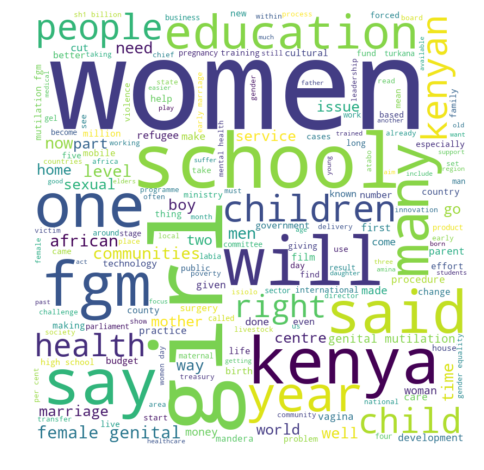

In [162]:
## Reference: https://www.datacamp.com/community/tutorials/wordcloud-python
## Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/

comment_words = ' '
stopwords = set(STOPWORDS)

# Iterate through the csv file
for val in df_contents.NewsContents:
    # Typecaste each val to string
    val = str(val)
    # Split the value
    tokens = val.split()
    # Convert each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    for words in tokens:
        comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'white', 
                      stopwords = stopwords).generate(comment_words)

# Plot the WordCloud image    
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()